# S2RSLDB: a comprehensive manually curated, internet-accessible database of the sigma-2 receptor selective ligands

### Imports

In [2]:
from smdt import datasets
from smdt import data_processing
from smdt import molecular_descriptors
from smdt import regression
import pandas as pd

### Data

#### Reading Data

In [24]:
Sigma2 = datasets.load_Sigma2ReceptorLigands()

Reference: 
G. Nastasi, C. Miceli, V. Pittala, M.N. Modica, O. Prezzavento, G. Romeo, A. Rescifina, A. Marrazzo, E. AmataS2RSLDB: a comprehensive manually curated, internet-accessible database of the sigma-2 receptor selective ligandsJ. Cheminform., 9 (2017), p. 3


In [27]:
Sigma2['Target'][0]

10.397940008672037

In [44]:
import numpy as np
-np.log10(2.1e-10)

9.67778070526608

#### Calculating Descriptors

In [11]:
data = molecular_descriptors.getAllDescriptors(Sigma2)


Calculating Molecular Descriptors...
Row 651 out of 651
Calculating Molecular Descriptors Completed.


In [3]:
data = pd.read_csv('data.csv')

#### Data Cleaning

In [4]:
y = data['Target']
X = data.drop(['Target'], axis=1)

#### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(520, 759)

In [6]:
X_test.shape

(131, 759)

In [13]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
a = Imputer(missing_values='NaN', strategy='median', axis=0)
b = StandardScaler()
c = SelectKBest(score_func=mutual_info_regression)
X_train = b.fit_transform(X_train)

In [15]:
X_train = c.fit_transform(X_train,y_train)

In [19]:
mask = c.get_support()
new_features = X_train.columns[mask]

In [20]:
new_features

Index(['bcutv13', 'bcutv10', 'bcutv2', 'bcutp2', 'Qass', 'QNss', 'Smin16',
       'GATSv5', 'MTPSA', 'slogPVSA2'],
      dtype='object')

### Models

#### Random Forest

In [6]:
model1, y_pred1, metrics1 = regression.fit_RandomForestRegressor(X_train, X_test, y_train, y_test)

#### Lasso

In [9]:
model2, y_pred2, metric2 = regression.fit_Lasso(X_train, X_test, y_train, y_test)

#### Ridge

In [10]:
model3, y_pred3, metric3 = regression.fit_Ridge(X_train, X_test, y_train, y_test)

#### ElasticNet

In [11]:
model4, y_pred4, metric4 = regression.fit_ElasticNet(X_train, X_test, y_train, y_test)

#### Linear SVR

In [12]:
model5, y_pred5, metric5 = regression.fit_LinearSVR(X_train, X_test, y_train, y_test)

In [4]:
import numpy as np
y_pred1 = np.load('ypred1.npy')
y_pred2 = np.load('ypred2.npy')
y_pred3 = np.load('ypred3.npy')
y_pred4 = np.load('ypred4.npy')
y_pred5 = np.load('ypred5.npy')

metric1 = np.load('metric1.npy')
metric2 = np.load('metric2.npy')
metric3 = np.load('metric3.npy')
metric4 = np.load('metric4.npy')
metric5 = np.load('metric5.npy')

### Parity Plots

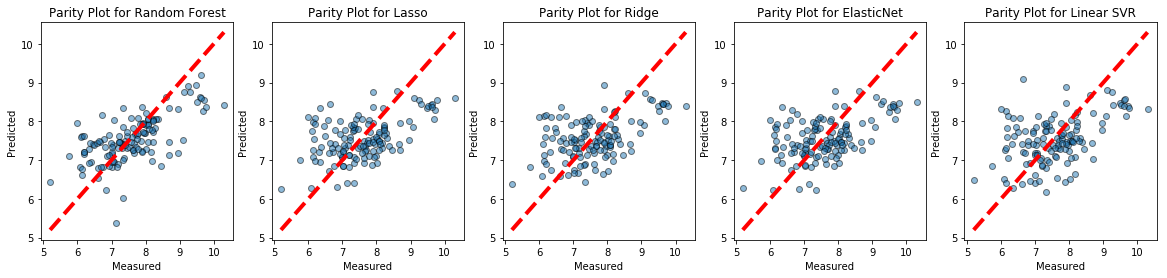

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.subplot(151)
plt.scatter(y_test, y_pred1, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Parity Plot for Random Forest')

plt.subplot(152)
plt.scatter(y_test, y_pred2, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Parity Plot for Lasso')

plt.subplot(153)
plt.scatter(y_test, y_pred3, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Parity Plot for Ridge')

plt.subplot(154)
plt.scatter(y_test, y_pred4, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Parity Plot for ElasticNet')

plt.subplot(155)
plt.scatter(y_test, y_pred5, edgecolors=(0, 0, 0), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Parity Plot for Linear SVR')

plt.show()

In [44]:
metric1

array([0.42739244, 0.42895552, 0.54878165, 0.53592752, 0.3713552 ,
       0.42739244])

In [49]:
results = pd.DataFrame([metric1,metric2,metric3,metric4,metric5])
name = ['Random Forest','Lasso','Ridge','ElasticNet','Linear SVR']
results[0] = name
results.columns = ['Model','r2 score','mae','mse','median ae','explained variance score']

In [50]:
results

,Model,r2 score,mae,mse,median ae,explained variance score
0,Random Forest,0.428956,0.548782,0.535928,0.371355,0.427392
1,Lasso,0.243192,0.696571,0.709127,0.580526,0.242338
2,Ridge,0.221448,0.698508,0.729156,0.591528,0.220939
3,ElasticNet,0.242132,0.699405,0.710133,0.597323,0.241264
4,Linear SVR,0.171967,0.709344,0.777372,0.573395,0.169423


In [46]:
Sigma2

,SMILES,Target
0,COC1=C(OC)C=C2CN(CCCCN3C4=CC=CC=C4C4=C3C=CC=C4...,10.397940
1,COC1=CC2=C(CN(CCCCNC(=O)C3=CN(N=N3)C3=CC=CC=C3...,8.823909
2,CC1(C)CCCN(CCCCC2=CCCC3=CC=CC=C23)C1,8.958607
3,COC1=C(OC)C=C2CN(CCCCNC(=O)C3=CC(I)=CC(OC)=C3O...,9.585027
4,COC1=CC=C(C=C1)N1C=C(N=N1)C(=O)NCCCCN1CCC2=CC(...,8.259637
5,COC1=CC=CC(=C1)N1C=C(N=N1)C(=O)NCCCCN1CCC2=C(C...,8.522879
6,COC1=CC2=C(CN(CCCCNC(=O)C3=CN(CC4=CC=C(O)C=C4)...,7.935542
7,FC1=CC=C(C=C1)C1=CC=C2OC(=O)N(CCCCN3CCN(CC3)C3...,11.214670
8,COC1=CC=CC=C1CN1C=C(N=N1)C(=O)NCCCCN1CCC2=C(C1...,8.013228
9,COC1=CC2=C(CN(CCCCNC(=O)C3=CN(N=N3)C3=CC=C(OCC...,7.659556
